In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(16 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)  # 10개의 클래스 (0~9 숫자)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # [1, 28, 28] → [8, 14, 14]
        x = self.pool(F.relu(self.conv2(x)))  # [8, 14, 14] → [16, 7, 7]
        x = x.view(-1, 16 * 7 * 7)            # Flatten
        x = F.relu(self.fc1(x))               # [784] → [128]
        x = self.fc2(x)                       # [128] → [10]
        return x


In [2]:
model = SimpleCNN()
x = torch.randn(4, 1, 28, 28)  # 배치 크기 4
output = model(x)
print(output.shape)  # torch.Size([4, 10])


torch.Size([4, 10])


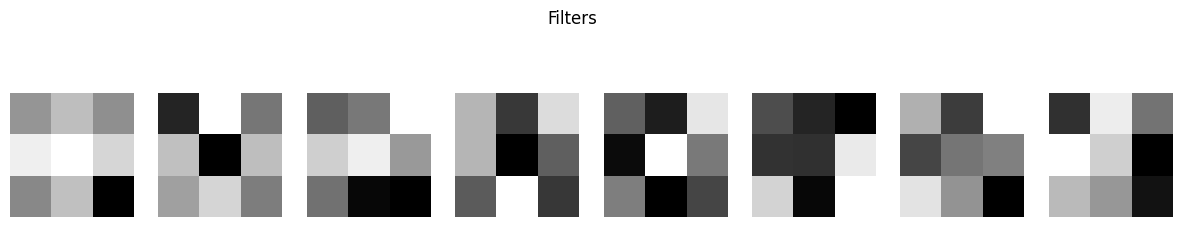

In [3]:
import matplotlib.pyplot as plt

# 모델의 첫 번째 합성곱 계층에서 필터 가중치 가져오기
weights = model.conv1.weight.data.clone()

# 필터 개수만큼 반복하면서 이미지로 출력
fig, axes = plt.subplots(1, 8, figsize=(15, 3))
for i in range(8):
    axes[i].imshow(weights[i][0], cmap='gray')  # 첫 번째 채널만 시각화
    axes[i].axis('off')
plt.suptitle("Filters")
plt.show()



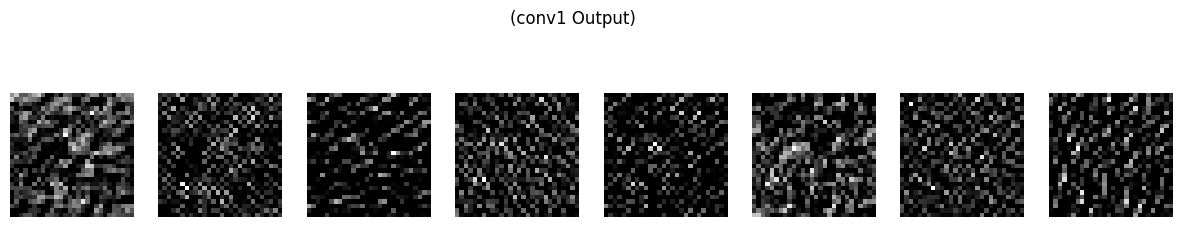

In [4]:
def visualize_feature_maps(model, image):
    # 입력 이미지 하나에 대해 forward 실행
    with torch.no_grad():
        x = image.unsqueeze(0)  # 배치 차원 추가: [1, 1, 28, 28]
        x = model.conv1(x)      # 첫 번째 합성곱 계층의 출력만 시각화
        x = F.relu(x)

    # 출력 특징 맵 시각화
    feature_maps = x.squeeze(0)  # 배치 차원 제거: [8, 28, 28]

    fig, axes = plt.subplots(1, 8, figsize=(15, 3))
    for i in range(8):
        axes[i].imshow(feature_maps[i], cmap='gray')
        axes[i].axis('off')
    plt.suptitle("(conv1 Output)")
    plt.show()

# 예시 사용
sample = torch.randn(1, 28, 28)  # 가상의 입력 이미지
visualize_feature_maps(model, sample)

